# Digital Image Processing - Problem Set 1

### Student Names: Jorge Aguilar, Jorge Lambraño

### Instructions

This first Problem Set covers the topics of basic image manipulation, spatial resolution and intensity level resolution. <br>

Your solutions to the following problems should include commented source code and a short description of each function. You should test your functions with several input images, **besides the ones provided here**. Include the input and output images that you used for experimentation. Analyze your results. If you discover something interesting, let us know!

<b>1. </b>Load image from a file and display the image. Determine the size of the image. Finally, save a new copy of the image in a new file.<br /> <br />

<img style="float: left; margin: 0px 0px 15px 15px;" src="files/cameraman.png" height="200" width="200">

In [1]:
from matplotlib import pyplot as plt 
import cv2

%matplotlib inline


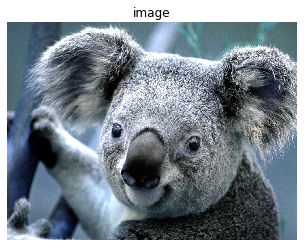

Image resolution:  1024 x 768


True

In [2]:
# load imagen on RBG format 
path_image = 'files/koala.png'
image = cv2.imread(path_image,cv2.IMREAD_COLOR)


# display image 
plt.figure()
plt.imshow(image) 
# remove axis
plt.axis('off');
plt.title('image')
plt.show()

# print resolution 
print('Image resolution: ', image.shape[1], 'x', image.shape[0]) 

# generate a copy of image 
cv2.imwrite('output_files/images/new_koala_image.png',image)

<b>2. </b>Write a function <code>flip_image</code>, which flips an image either vertically or horizontally. The function should take two input parameters: the matrix storing the image data and a flag to indicate whether the image should be flipped vertically or horizontally. Use this function to flip an example image both vertically and horizontally.

<b>Note:</b> You are not allowed to use the OpenCV's flip function to solve this problem. You have to implement it by yourself<br /> <br />

<img style="float: left; margin: 0px 0px 15px 15px;" src="files/lena/Woman.bmp" height="200" width="200">

In [3]:
import numpy as np 

In [4]:
#funcion flip_image
def flip_image(image_matrix, flag):
    if(flag == 0): 
        return np.fliplr(image_matrix) 
    if(flag == 1): 
        return np.flipud(image_matrix) 
    else: 
        print('Error: flag must be 1 or 0.')
        return 0

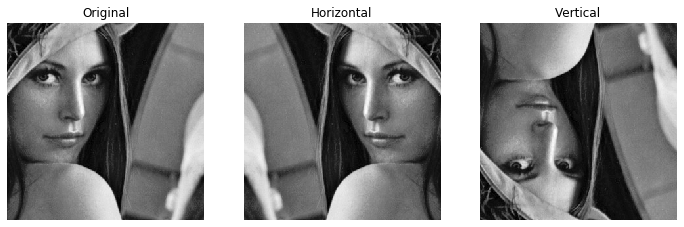

In [5]:
plt.figure(figsize = (12,6))

woman_image = cv2.imread('files/lena/Woman.bmp', cv2.IMREAD_GRAYSCALE)
img_fliplr = flip_image(woman_image,0)
img_flipud = flip_image(woman_image,1)

plt.subplot(1, 3, 1)
plt.imshow(woman_image, cmap='gray')
plt.title('Original')
plt.axis('off');

plt.subplot(1, 3, 2)
plt.imshow(img_fliplr, cmap='gray')
plt.title('Horizontal')
plt.axis('off');

plt.subplot(1, 3, 3)
plt.imshow(img_flipud, cmap='gray')
plt.title('Vertical')
plt.axis('off');


<b>3. </b> Write a function to generate the negative of an image. This means that  a new image is created in which the pixel values are all equal to 1.0 minus the pixel value in the original image. <br /> <br />

<img style="float: left; margin: 0px 0px 15px 15px;" src="files/moon.jpg" height="200" width=200>

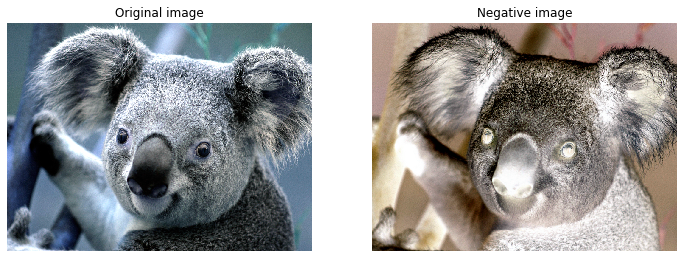

In [6]:
imagen = cv2.imread(path_image,cv2.IMREAD_COLOR)
imagen_neg = 255 - imagen

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(imagen)
plt.title('Original image')
plt.axis('off');

plt.subplot(1, 2, 2)
plt.imshow(imagen_neg)
plt.title('Negative image')
plt.axis('off');

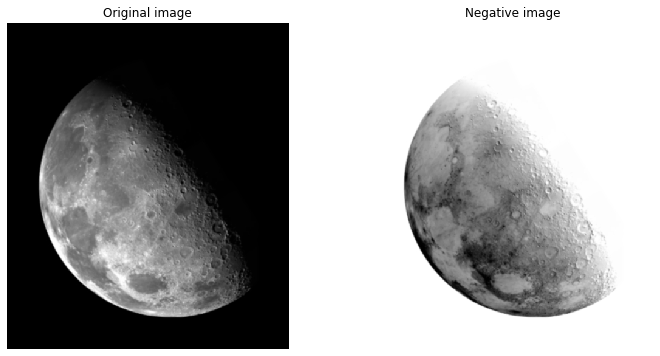

In [7]:
imagen = cv2.imread('files/moon.jpg',cv2.IMREAD_COLOR)
imagen_neg = 255 - imagen

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(imagen)
plt.title('Original image')
plt.axis('off');

plt.subplot(1, 2, 2)
plt.imshow(imagen_neg)
plt.title('Negative image')
plt.axis('off');

<b>4. </b>Write a function <code>average_intensity</code>, which calculates the average intensity level of an image. Use this function on example images and discuss your results. You can use images from section 2 and 3 <br /> <br />

In [8]:
def average_intensity(matrix_image):
    n_elements = np.product(matrix_image.shape)
    return np.ceil(np.sum(matrix_image)/n_elements) 

The average intensity from Koala image is 115.0


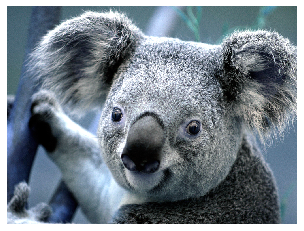

In [9]:
koala_image = cv2.imread(path_image ,cv2.IMREAD_COLOR)
koala_intensity = average_intensity(koala_image)
plt.imshow(koala_image)
plt.axis('off')
print("The average intensity from Koala image is " + str(koala_intensity))

<b>5. </b>Write a function <code>threshold_image</code> which thresholds an image based on a threshold level given as a parameter to the function. The function should take two parameters: the image to be thresholded and the threshold level. The result of the function should be a new thresholded image. <br /> <br />

<b>Note:</b> You are not allowed to use the OpenCV's threshold function to solve this problem. You have to implement it by yourself<br /> <br />

In [10]:
def threshold_image(image,threshold):
    new_image = np.where(image < threshold, 0, 255)
    return new_image

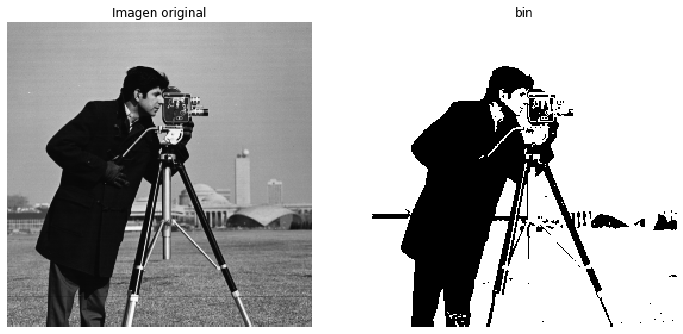

In [11]:
image = cv2.imread('files/cameraman.png')
imagebin = threshold_image(image,70)


plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Imagen original')
plt.axis('off');

plt.subplot(1, 2, 2)
plt.imshow(imagebin)
plt.title('bin')
plt.axis('off');

plt.show()

<b>6. </b>Write a function <code>avg_intensity_threshold_image</code> which takes an image as its only parameter and thresholds this image based on the images average intensity value. <b>Hint:</b> Simply write a new function that uses the two functions just written. <br /> <br />

In [12]:
def avg_intensity_threshold_image(matrix_image):
    average = average_intensity(matrix_image)
    new_image = threshold_image(matrix_image,average)
    return new_image

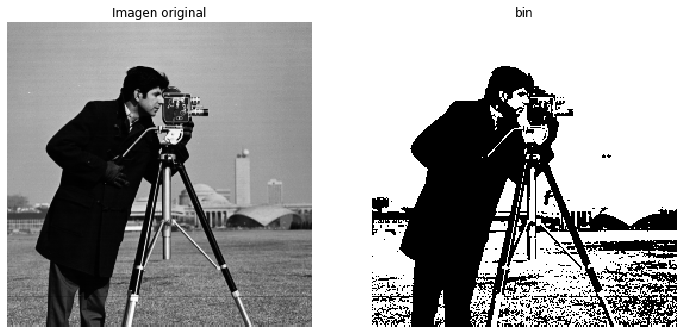

In [13]:
original_image = cv2.imread('files/cameraman.png',0)

image_bin = avg_intensity_threshold_image(original_image)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(original_image,cmap='gray')
plt.title('Imagen original')
plt.axis('off');

plt.subplot(1,2,2)
plt.imshow(image_bin,cmap='gray')
plt.title('bin')
plt.axis('off');

plt.show()



<b>7. </b>Write a function which subsamples a grayscale image of size 512x512 by factors of 2, i.e., 256, 128, 64 and display your results. There are multiple ways to do this as discussed in the textbook. You may simply sub-sample, average, etc.  Describe which you used and why.

<img style="float: left; margin: 0px 0px 15px 15px;" src="files/rose.bmp" height="256" width="256">
<img style="float: left; margin: 0px 0px 15px 15px;" src="files/rose.bmp" height="128" width="128">
<img style="float: left; margin: 0px 0px 15px 15px;" src="files/rose.bmp" height="64" width="64">
<img style="float: left; margin: 0px 0px 15px 15px;" src="files/rose.bmp" height="32" width="32">


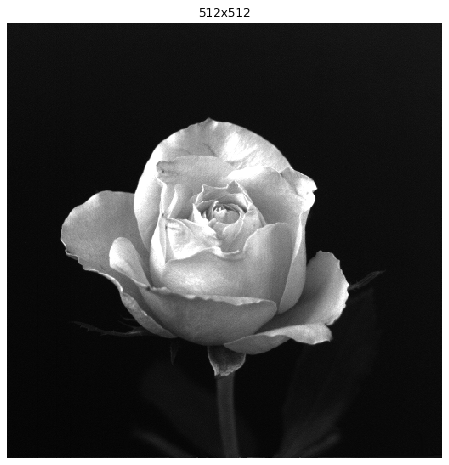

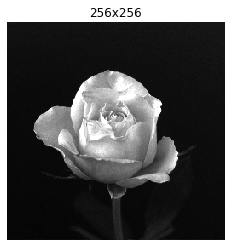

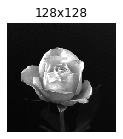

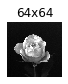

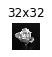

In [14]:
rose_image = cv2.imread('files/rose.bmp',cv2.IMREAD_COLOR)
h = rose_image.shape[0]
w = rose_image.shape[1]
scales = [0.5, 0.25, 0.125, 0.0625, 0.03125]

n = len(scales); 

for i in range(n): 
    new_image = cv2.resize(rose_image, None, fx=scales[i], fy=scales[i], interpolation = cv2.INTER_CUBIC)
    height = new_image.shape[0]
    width = new_image.shape[1]
    
    plt.figure(figsize = (16 * scales[i], 16 * scales[i]))
    plt.imshow(new_image)
    plt.title(str(height) + "x" + str(width))
    plt.axis('off');
    
    plt.show()


<b>8. </b>Keeping your original image resolution reduce the number of gray levels in your image from 256 to 2 in powers of 2. Display your results.

<img style="float: left; margin: 0px 0px 15px 15px;" src="files/x_ray/skull.bmp" height="200" width=200>

In [27]:
def reduce_greys_levels(matrix_image, flag): 
    value = 255
    for _ in range(flag):
        value = value // 2
    value = value * 2 ** flag
    new_image = cv2.bitwise_and(matrix_image, value)
    # new_image = (2**flag) * np.floor((matrix_image)/(2**flag ))
    return new_image

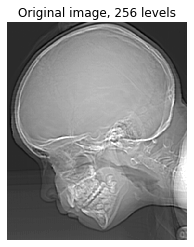

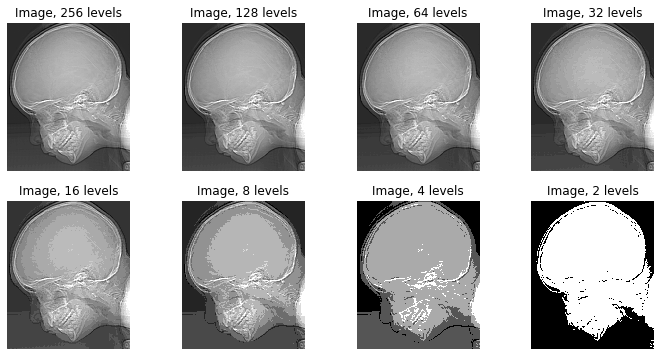

In [31]:
#skull_image = cv2.imread('imagenes/cameraman.png',cv2.IMREAD_GRAYSCALE)
skull_image = cv2.imread('files/x_ray/skull.bmp',cv2.IMREAD_GRAYSCALE)

plt.figure()
plt.imshow(skull_image, cmap='gray')
plt.title('Original image, 256 levels')
plt.axis('off')

reduce_level = [0, 1, 2, 3, 4, 5, 6, 7] 
n = len(reduce_level)

cols = 4
rows = len(reduce_level) // cols if len(reduce_level) % cols == 0 else len(reduce_level) // cols + 1 

plt.figure(figsize=(3 * cols, 3 * rows))

for i, item in enumerate(reduce_level): 
    modifed_image = reduce_greys_levels(skull_image, item);

    plt.subplot(rows, cols, i + 1)
    plt.imshow(modifed_image,cmap='gray')
    plt.title('Image, ' + str(round(256/(2**item))) + ' levels')
    plt.axis('off')

plt.show()